In [1]:
!pip install fal-client

In [1]:
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# https://fal.ai/dashboard/keys
# put your key in the .env file with the name FAL_KEY

True

 89%|████████▉ | 34/38 [00:02<00:00, 13.67it/s]
{'images': [{'url': 'https://v3.fal.media/files/koala/jL7d1xpBcyWzW1F0wIjXZ.png', 'width': 1024, 'height': 768, 'content_type': 'image/png'}], 'timings': {'inference': 2.9035388492047787}, 'seed': 711234845, 'has_nsfw_concepts': [False], 'prompt': 'a rhino dressed as a wizard with a background of a mystic forest.'}
\Before transformation:


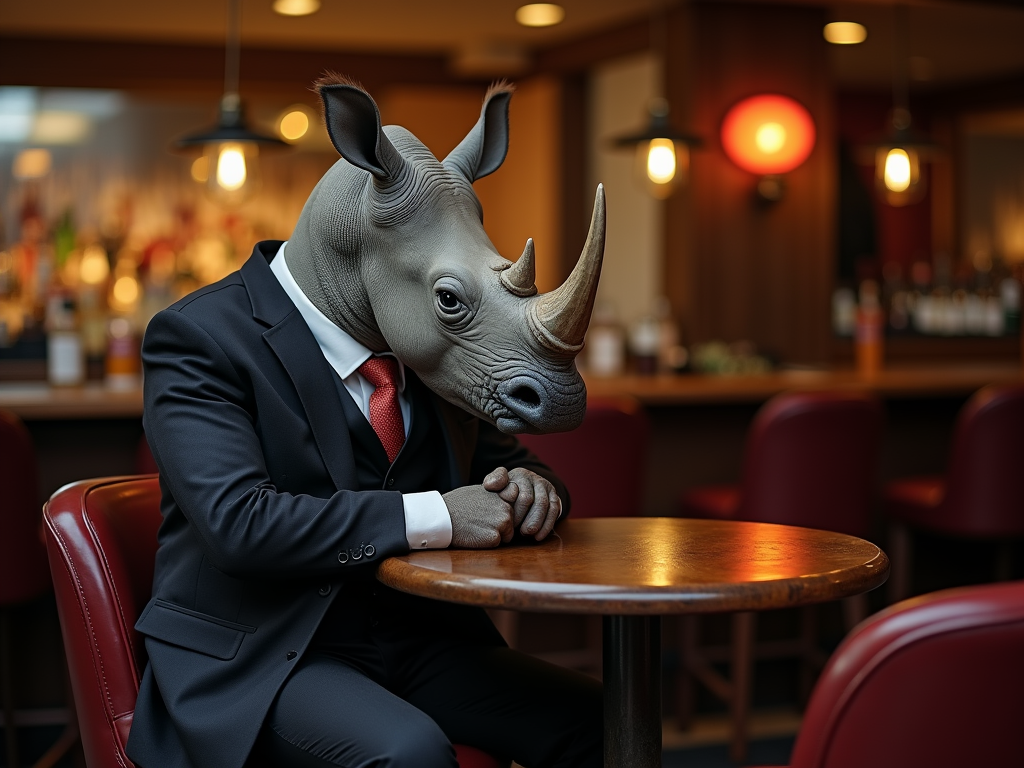


After transformation:


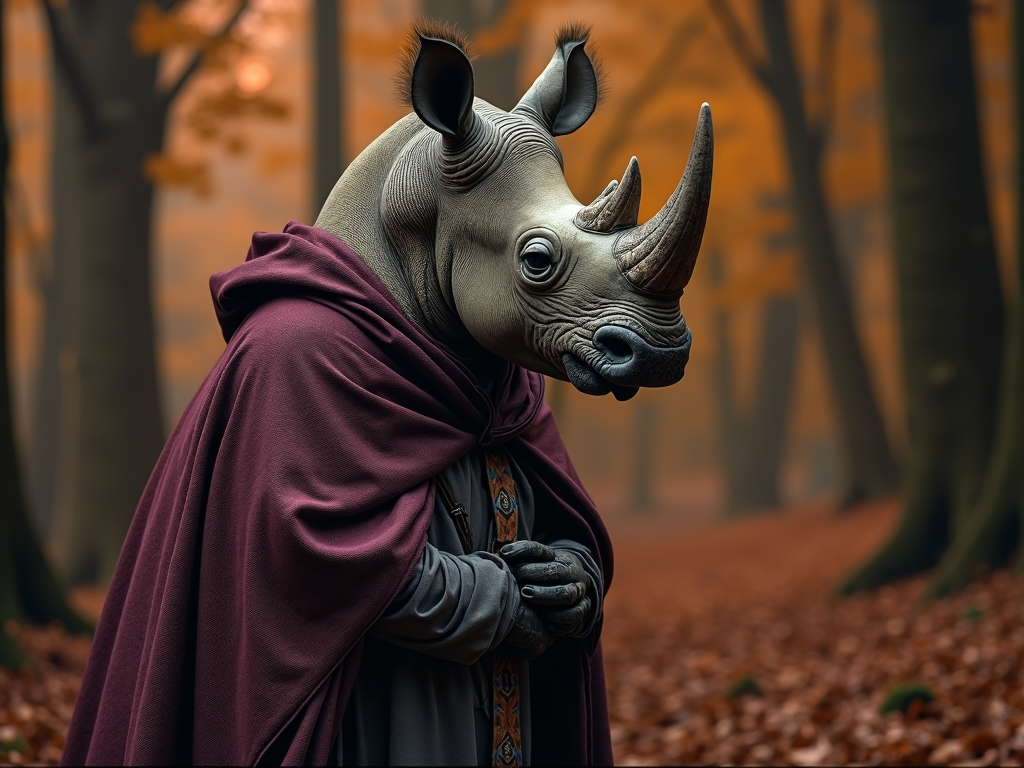

In [1]:
import fal_client
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

def on_queue_update(update):
    if isinstance(update, fal_client.InProgress):
        for log in update.logs:
           print(log["message"])

url = fal_client.upload_file("rhino-suit.png")

prompt = "a rhino dressed as a wizard with a background of a mystic forest."

result = fal_client.subscribe(
    "fal-ai/flux/dev/image-to-image",
    arguments={
        "image_url": url,
        "prompt": prompt
    },
    with_logs=True,
    on_queue_update=on_queue_update,
)
print(result)

# Load original image
print("\Before transformation:")
original_img = Image.open("rhino-suit.png")
display(original_img)
print("\nAfter transformation:")

# Get and display transformed image
image_url = result['images'][0]['url']
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
display(img)